# Modeling Differential Equations with Julia and [DifferentialEquations.jl](https://docs.sciml.ai/stable/)



DifferentialEquations.jl is a package for Julia that provides a superb suite of high quality implementations for numerical solvers for differential equations problems. We recommend the following videos for a tutorial and more information:

1. [Intro to solving DEs in Julia](https://www.youtube.com/watch?v=KPEqYtEd-zY&feature=youtu.be)
2. [Juia and DifferentialEquations.jl](https://www.youtube.com/watch?v=zJ3R6vOhibA&t=1490s)

In [1]:
# Load necessary packages with using keyword
using DifferentialEquations, ParameterizedFunctions, Latexify, Plots; pyplot();

$\frac{dx}{dt} = \alpha x - \beta x y$

$\frac{dy}{dt} = \gamma xy - \delta y$

In [2]:
# create function to model right hand side
function lv_f1(du,u,p,t)
    x,y = u
    α,β,γ,δ = p
    du[1] = α*x - β*x*y
    du[2] = γ*x*y - δ*y
end

lv_f1 (generic function with 1 method)

In [3]:
# specify parameters and initial conditions
p = (1.5,1.0,3.0,1.0);
u0 = [1.0,1.0];

In [4]:
# specify time interval
tspan = (0.0,10.0);

In [5]:
prob1 = ODEProblem(lv_f1,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

In [6]:
sol1 = solve(prob1);

In [7]:
# access time values
sol1.t

25-element Array{Float64,1}:
  0.0                
  0.07544027691131173
  0.21364255647743985
  0.36898743324660477
  0.5610316402696482 
  0.7845503380866679 
  1.0097556174275868 
  1.2983231247063953 
  1.5770570925792562 
  1.96497334462931   
  2.3223268365369014 
  2.7598011040321904 
  3.2892049546723237 
  4.00730372704307   
  4.683044629957971  
  5.460160999124588  
  6.1904092133513595 
  6.657730718030581  
  7.125670990624224  
  7.5965508494336165 
  7.982657269377145  
  8.504946918606274  
  9.041311837127928  
  9.940248252187757  
 10.0                

In [8]:
# access solution values
sol1.u

25-element Array{Array{Float64,1},1}:
 [1.0, 1.0]                                
 [1.0321249609481256, 1.1673528333429075]  
 [1.0526497545986224, 1.5694252448048358]  
 [0.9955273719727826, 2.1733169786547224]  
 [0.8057173563581979, 3.0293435864790252]  
 [0.5216538549091523, 3.7781351730813766]  
 [0.3026570443872591, 3.9619863177416623]  
 [0.15527851669494425, 3.5882849160222157] 
 [0.09398388364297039, 3.003136066823378]  
 [0.06129769583821188, 2.2223126845021812] 
 [0.052683757024689803, 1.6506151133108569]
 [0.05550754515607468, 1.142655445761573]  
 [0.07517451192344564, 0.7446498087241797] 
 [0.1454523266646892, 0.4550245783314417]  
 [0.3071308665150126, 0.358095272663854]   
 [0.7225815168565966, 0.515977640881975]   
 [1.0240209771731055, 1.9621104864428613]  
 [0.5208522553855134, 3.7782017174866405]  
 [0.1718737897702483, 3.669447363809328]   
 [0.07719696428523605, 2.692168559822453]  
 [0.05628439294569419, 1.9722267893674603] 
 [0.05350867756904241, 1.2716205191859

### Solutions to Differential Equations are Continuous Functions!

The solution output from the solve functions allows for continuous interpolation.

In [9]:
sol1.t[2]

0.07544027691131173

In [10]:
sol1(0.01)

2-element Array{Float64,1}:
 1.004911114012157 
 1.0202769076266633

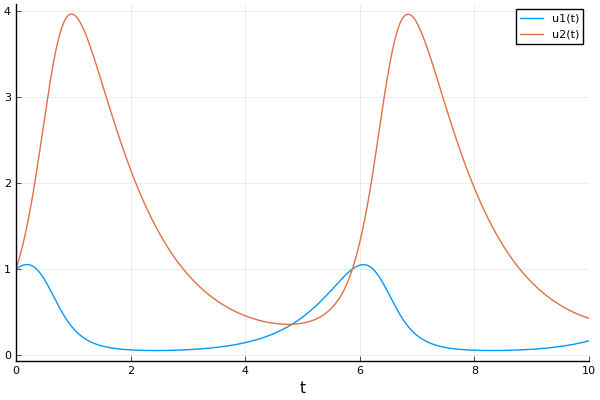

In [11]:
# can just plot the solution
plot(sol1)

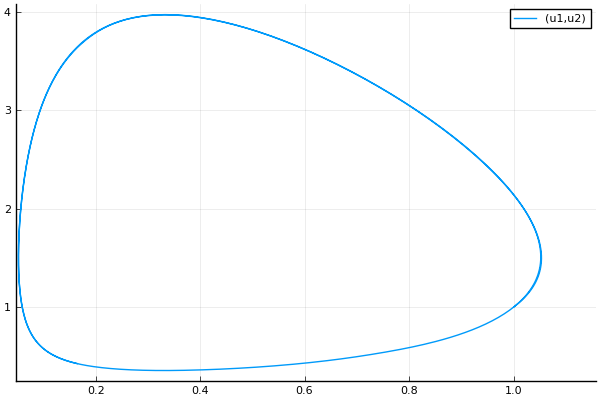

In [12]:
# if we want a phase-plane plot
plt=plot(sol1,vars=(1,2))

In [13]:
u01 = 0.0:0.1:1.0;
u02 = ones(length(u01))
u0M = [u01 u02];

In [14]:
n = size(u0M)[1];
for i = 1:n
    u0 = u0M[i,:];
    prob = ODEProblem(lv_f1,u0,tspan,p);
    sol = solve(prob);
    plt=plot!(sol,vars=(1,2))
end

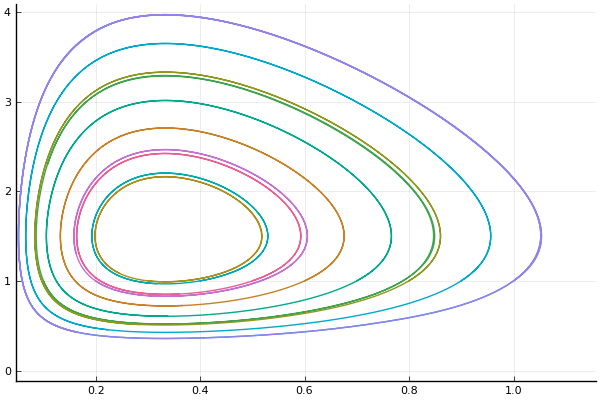

In [15]:
plt = plot!(legend=false)

### Using Parameterized Functions

In [25]:
# here right hand side is specified as a parameterized function
predatorprey! = @ode_def PredatorPrey begin
  dx = α*x - β*x*y
  dy = γ*x*y - δ*y
end α β γ δ



(::PredatorPrey{var"###ParameterizedDiffEqFunction#598",var"###ParameterizedTGradFunction#599",var"###ParameterizedJacobianFunction#600",Nothing,Nothing,ModelingToolkit.ODESystem}) (generic function with 1 method)

We can obtain the $\LaTeX$ expression of a parameterized function!

In [27]:
latexify(predatorprey!)

L"$\begin{align}
\frac{dx(t)}{dt} =& \alpha \mathrm{x}\left( t \right) - \beta \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) \\
\frac{dy(t)}{dt} =& \gamma \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) - \delta \mathrm{y}\left( t \right)
\end{align}
$"

Now let's solve this system again. 

In [53]:
p = (1.5,1.0,3.0,1.0); # parameters
u0 = [1., 1.]; # initial conditions
tspan = (0., 10.); # time interval 
prob = ODEProblem(predatorprey!, u0, tspan, p);
sol = solve(prob);

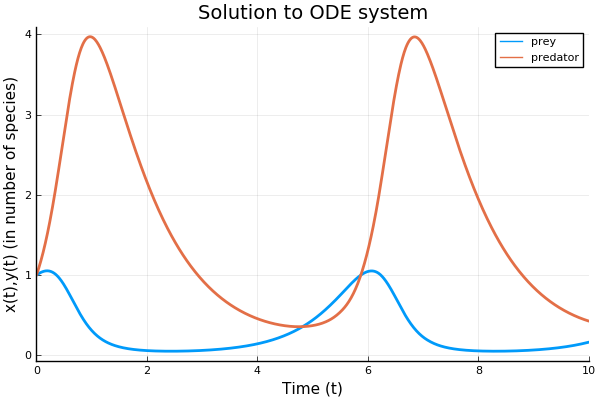

In [54]:
plot(sol,linewidth=2,title="Solution to ODE system",
xaxis="Time (t)",yaxis="x(t),y(t) (in number of species)",label=["prey" "predator"])

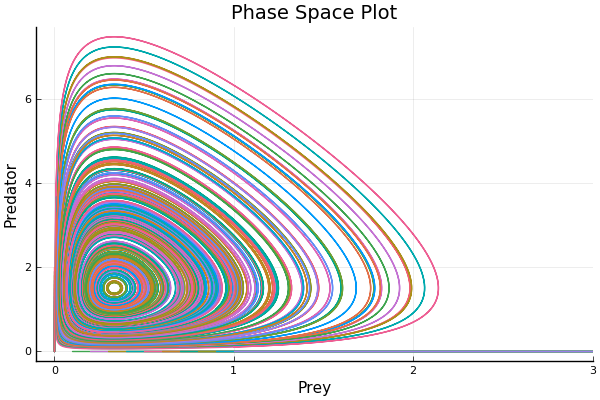

In [55]:
p = plot(sol,vars = (1,2), xlims = (-0.1,3), title = "Phase Space Plot", xaxis = "Prey", yaxis = "Predator", leg=false)
function phase_plot(prob, u0, parms, p, tspan=10.0)
    _prob = ODEProblem(prob.f,u0,(0.0,tspan),parms)
    sol = solve(_prob,Vern9()) # Use Vern9 solver for higher accuracy
    plot!(p,sol,vars = (1,2), xlims = nothing, ylims = nothing)
end
for i in 0.:0.1:2.0
    for j in 0.:0.1:1.0
        phase_plot(prob, [j,i],[1.5,1.0,3.0,1.0],p)
    end
end
plot(p,xlims = (-0.1,3))

### Another Approach Using [DynamicalSystems.jl](https://juliadynamics.github.io/DynamicalSystems.jl/latest/)

In [56]:
using DynamicalSystems

In [57]:
# create function to model right hand side
function ppsys!(du,u,p,t)
    x,y = u
    α,β,γ,δ = p
    du[1] = α*x - β*x*y
    du[2] = γ*x*y - δ*y
    return nothing
end

ppsys! (generic function with 1 method)

In [58]:
p = (1.5,1.0,3.0,1.0);
u0 = [1.0,1.0];
hh = ContinuousDynamicalSystem(ppsys!,u0,p);

In [59]:
tr = trajectory(hh,10.0,dt=0.01)

2-dimensional Dataset{Float64} with 1001 points
 1.0       1.0     
 1.00491   1.02028 
 1.00964   1.04112 
 1.01417   1.06253 
 1.01851   1.08452 
 1.02263   1.10712 
 1.02654   1.13032 
 1.03022   1.15413 
 1.03367   1.17858 
 1.03686   1.20366 
 1.03981   1.22939 
 1.04249   1.25577 
 1.0449    1.28282 
 ⋮                 
 0.147148  0.452375
 0.1487    0.449866
 0.150271  0.447392
 0.151863  0.444952
 0.153476  0.442547
 0.155109  0.440176
 0.156764  0.43784 
 0.15844   0.435538
 0.160137  0.433269
 0.161856  0.431035
 0.163597  0.428835
 0.165361  0.426668

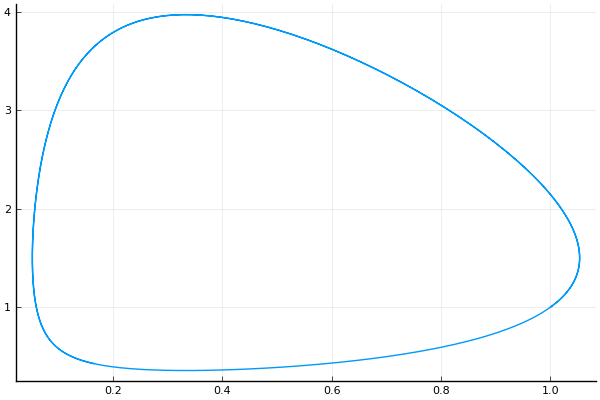

In [60]:
plot(tr[:,1],tr[:,2],legend=false)